Creat the variable that will hold the data sets for the classification (N se mexe)

In [1]:
from sklearn.datasets import make_classification,make_regression,make_circles,make_moons
import numpy as np
import pandas as pd
datasets_classification = []
def generate_datasets_classification(n_samples, n_features, n_informative, n_redundant, n_repeated, n_classes, 
                      n_clusters_per_class, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, 
                      shift=0.0, scale=1.0, shuffle=True, random_state=None):
    
    X, Y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, 
                               n_redundant=n_redundant, n_repeated=n_repeated, n_classes=n_classes, 
                               n_clusters_per_class=n_clusters_per_class, weights=weights, flip_y=flip_y, 
                               class_sep=class_sep, hypercube=hypercube, shift=shift, scale=scale, 
                               shuffle=shuffle, random_state=random_state)
    datasets_classification.append((X, Y))
def generate_datasets_classification_circles(n_samples,shuffle=True, noise=None, factor=0.8, random_state=42):

    X, Y = make_circles(n_samples=n_samples,shuffle=shuffle, noise=noise, factor=factor, random_state=random_state)

    datasets_classification.append((X, Y))

def generate_datasets_classification_moons(n_samples, shuffle=True, noise=None, random_state=None):
    
    X, Y = make_moons(n_samples=n_samples, shuffle=shuffle, noise=noise, random_state=random_state)

    datasets_classification.append((X,Y))

    


datasets_regression = []
def generate_datasets_regression( n_samples, n_features, n_informative,n_targets = 1,bias = 0,effective_rank=None, tail_strength=0.5, 
                                 noise=0.0, shuffle=True, coef=False, random_state=None ):

    X, Y= make_regression(n_samples=n_samples, n_features=n_features,n_informative=n_informative,n_targets=n_targets, bias = bias,
                          effective_rank =effective_rank, tail_strength=tail_strength, noise=noise, shuffle=shuffle, coef=coef, 
                          random_state=random_state)
    datasets_regression.append((X, Y))

   



Fill the "dataset_classification" variable with  diferent datasets using diferent the parameters (The first being the defaut)(Mexer aqui nos valores dos parametros e escolher se se quer classification or regression)

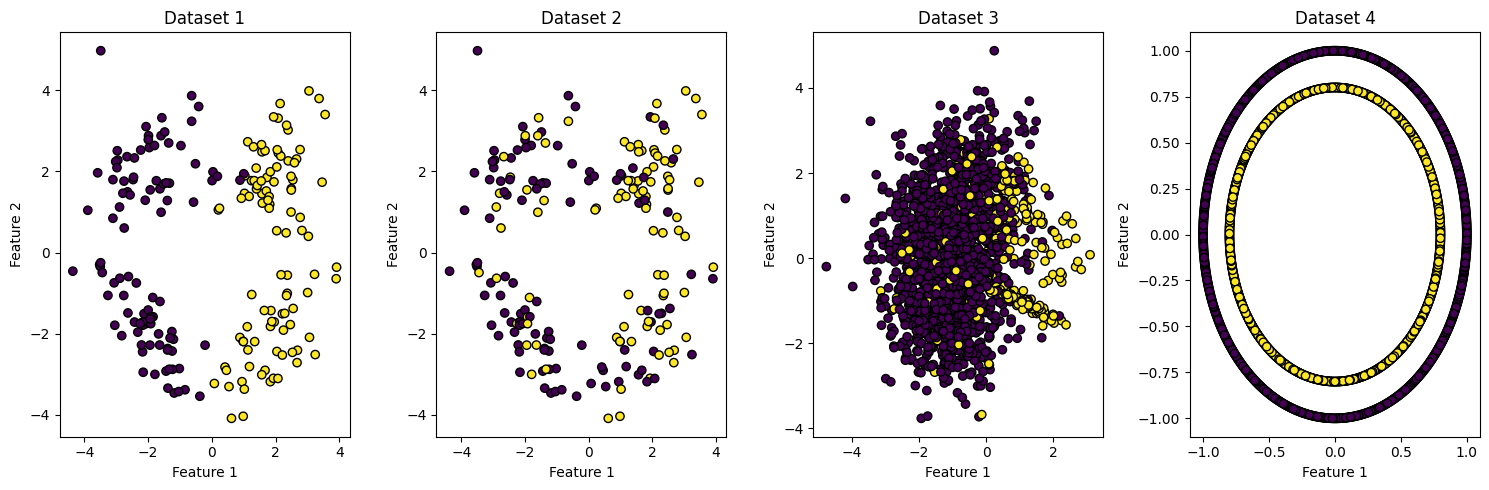

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate classification

generate_datasets_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, 
                      n_clusters_per_class=2, weights=None, flip_y=0, class_sep=2.0, hypercube=True, shift=0.0, 
                      scale=1.0, shuffle=True, random_state=42),
generate_datasets_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, 
                      n_clusters_per_class=2, weights=None, flip_y=0.5, class_sep=2.0, hypercube=True, shift=0.0, 
                      scale=1.0, shuffle=True, random_state=42),
generate_datasets_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, 
                      n_clusters_per_class=2, weights=[0.9,0.1], flip_y=0.1, class_sep=1.0, hypercube=True, shift=0.0, 
                      scale=1.0, shuffle=True, random_state=42)
generate_datasets_classification_circles(n_samples=2000,noise=0,factor=0.8, random_state=42)

# Generate regression
generate_datasets_regression(n_samples=200, n_features=2, n_informative=2)

#choose classification or regression datasets
dataset = datasets_classification

# Plot the datasets
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, (X, Y) in enumerate(dataset):
    axes[i].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k')
    axes[i].set_title(f"Dataset {i+1}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
plt.tight_layout()
plt.show()


Choice of the method and the dataset in análise(escolher o dataset a ser analisado agora(para ja so dá um de cada vez) e o metodo dentro dos que tao comentados em cima)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier
# Apply SVM with linear kernel only to the last dataset
X, Y = dataset[-1] # here decide wich dataset to use
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#DecisionTreeClassifier()
#DecisionTreeClassifier(max_depth=2)
#LogisticRegression()
#LDA()
#QDA()
#SVC(kernel='linear')
#SVC(kernel='rbf')

model = SVC(kernel='rbf')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test,Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

# Plot decision boundary
print(f"Model Accuracy: {accuracy:.2f}" + " " + f"Model f1: {f1:.2f}" + " " + f"Model recall: {recall:.2f}"+ " " + f"Model precision: {precision:.2f}")

Model Accuracy: 1.00 Model f1: 1.00 Model recall: 1.00 Model precision: 1.00


Function for ploting the decision boundary(n é preciso mexer)

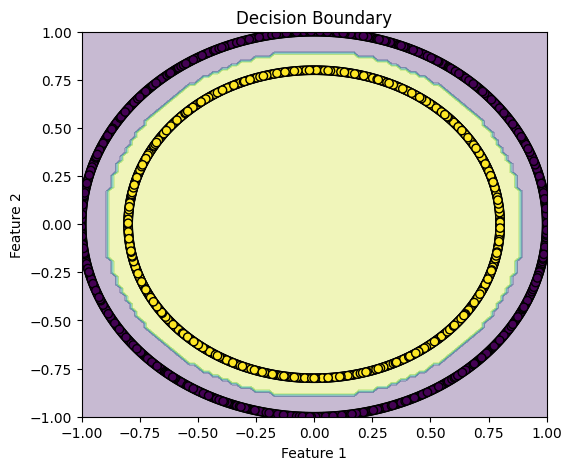

In [ ]:

def plot_decision_boundary(model, X, Y):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()
# Apply SVM with linear kernel only to the last dataset

plot_decision_boundary(model, X, Y)



ROC curve plus Confusion Matrix( n é preciso mexer)

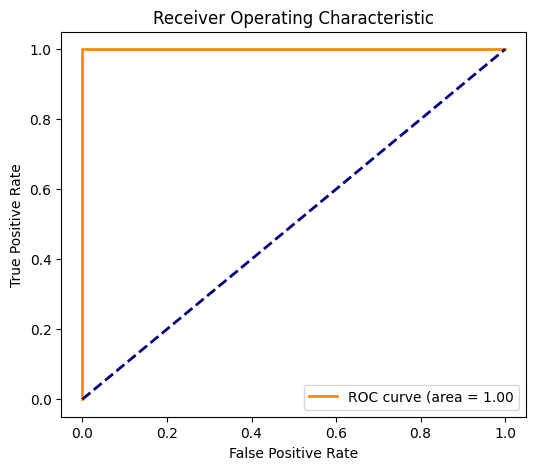

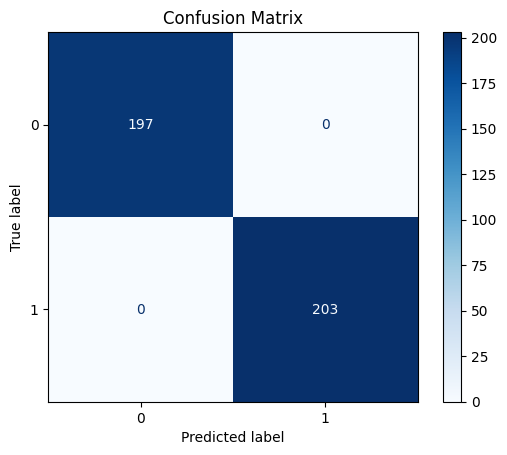

In [ ]:
from sklearn.metrics import roc_curve, auc,confusion_matrix, ConfusionMatrixDisplay

def plot_roc_curve(model, X_test, Y_test):
    if hasattr(model, "decision_function"):
        Y_score = model.decision_function(X_test)
    else:
        Y_score = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(Y_test, Y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    
# Plot ROC curve
plot_roc_curve(model, X_test, Y_test)

# Plot Confusion Matrix
plot_confusion_matrix(Y_test, Y_pred)




